<a href="https://colab.research.google.com/github/SalmoliChandra456/EDA-on-Airbnb/blob/main/EDA_AIRBNB_NYC_2019_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

EDA Learnings : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

### DATA LOADING

In [ ]:
#importing the required libraries for our analysis
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#lets load the data
airbnb_df=pd.read_csv('Airbnb NYC 2019.csv')

We have loaded the data, lets analyse type of data we have breifly to get a better idea before staring complex analysis

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### DATA WRANGLING

We got an idea about the data, now lets do some basic manupulation to structure our data well to do further analysis. Here, we are removing duplicate rows if exists, handling null values of desired columns and droping  undesired columns. The manipulated data is being stored as a new dataframe

In [ ]:
#removing duplicates
newdf = airbnb_df.drop_duplicates()
#replacing missing values 
newdf.fillna({'reviews_per_month':0}, inplace=True)
#removing unnecessary columns
newdf.drop(['id','last_review'],axis=1, inplace=True)
#replacing zero values in price column with the mean value
newdf['price'].replace({0 : newdf['price'].mean()}, inplace = True)

In [ ]:
#lets check our new df
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  float64
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
newdf.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.755045,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.143242,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## EXPLORATORY DATA ANALYSIS


Now our data is clean and ready to be used for some deep analysis using data visualization

Lets check the percentage share of rooms in different neighbourhood groups

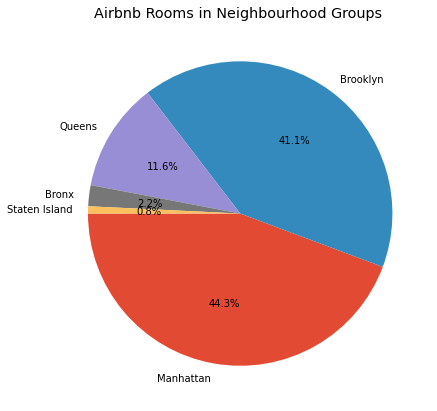

In [ ]:
#rooms shares in each neighbourhood group 
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Airbnb Rooms in Neighbourhood Groups ")
g = plt.pie(newdf.neighbourhood_group.value_counts(), labels=newdf.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

Most number of rooms are in Manhattan and Brooklyn
followed by Queens, Staten Island and Bronx

Now lets check the room types in each neighbourhood groups

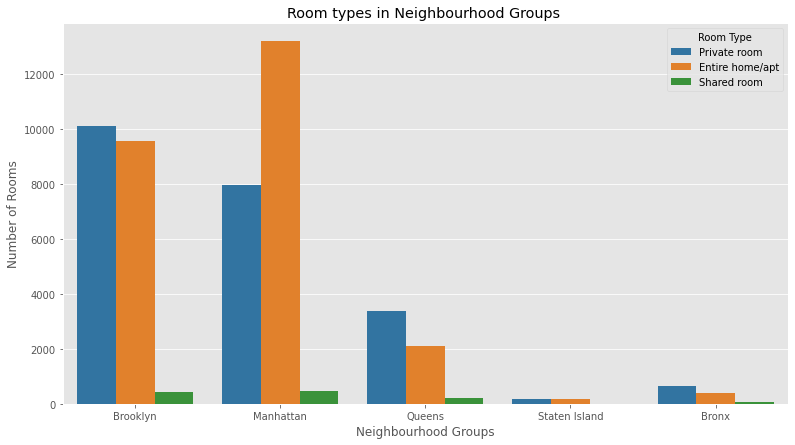

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(data = newdf, x='neighbourhood_group', hue='room_type', palette="tab10")
plt.title("Room types in Neighbourhood Groups ")
plt.ylabel("Number of Rooms")
plt.xlabel("Neighbourhood Groups")
plt.legend(title='Room Type')
plt.show()

Manhattan has the highest share of Entire home/apt. Brooklyn has the highest share of Private rooms

Now lets find out the Average price of Rooms in each neighbourhood groups 

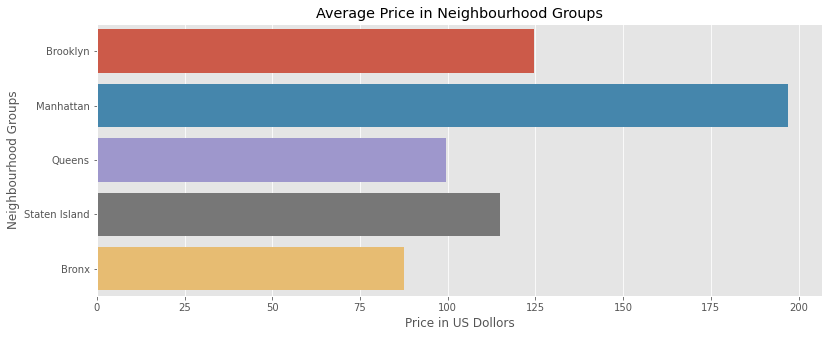

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(y = 'neighbourhood_group', x = 'price',data = newdf, ci = None)
plt.title("Average Price in Neighbourhood Groups")
plt.ylabel("Neighbourhood Groups")
plt.xlabel("Price in US Dollors")
plt.show()

Manhatten holds the maximum average price

Now lets check average price of each room type.

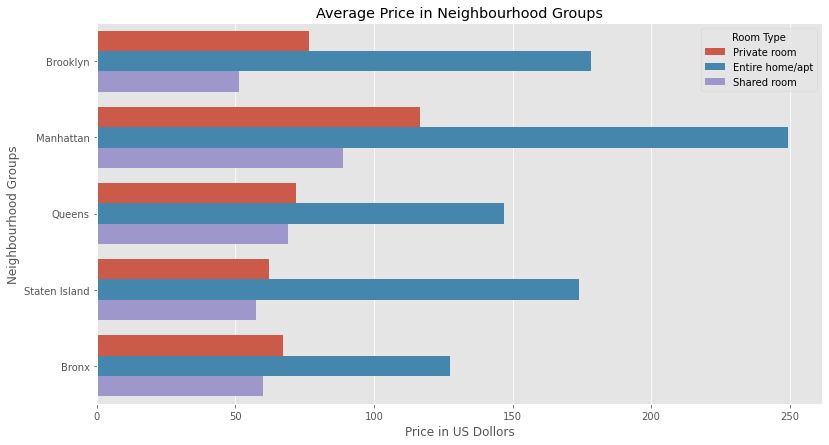

In [ ]:
#average room type price 
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(y = 'neighbourhood_group', x = 'price',hue= "room_type", data = newdf, ci = None)
plt.title("Average Price in Neighbourhood Groups")
plt.ylabel("Neighbourhood Groups")
plt.xlabel("Price in US Dollors")
plt.legend(title='Room Type')
plt.show()

Entire home/apt are the most expensive room type in all the neighbourhood groups. Private room holds the second position and shared room is the least expensive

Neighbourhood Group vs. Availability Room #MEE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


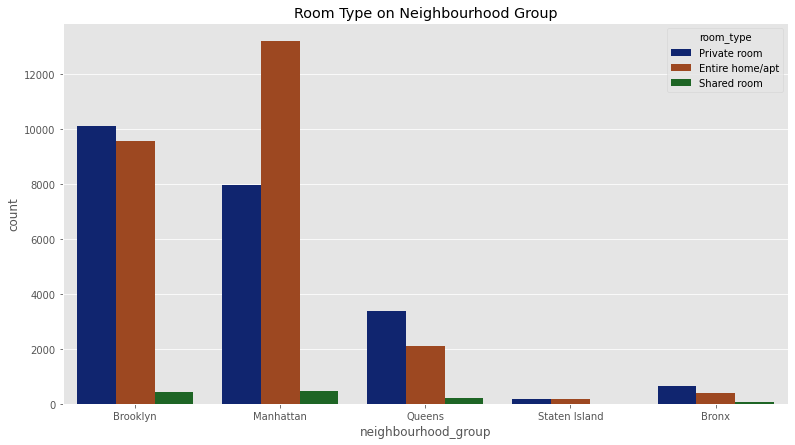

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(newdf.neighbourhood_group,hue=newdf.room_type, palette="dark")
plt.show()

INSIGHT-->The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal

Room type  #MEE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


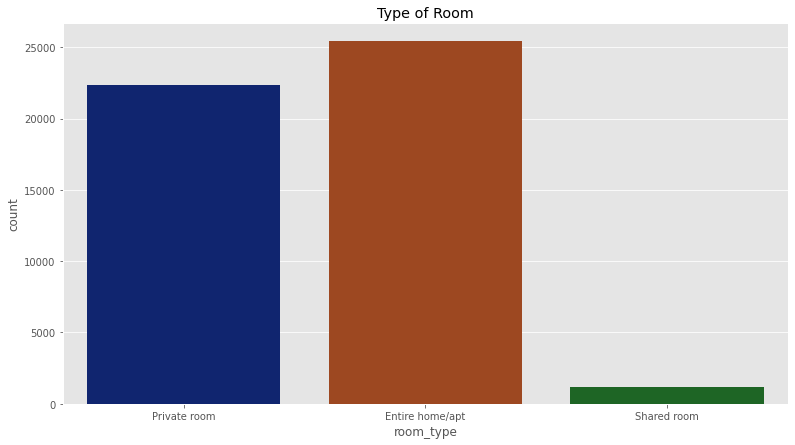

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(newdf.room_type, palette="dark")
fig = plt.gcf()
plt.show()

INSIGHT-->We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room

Now lets check the map view

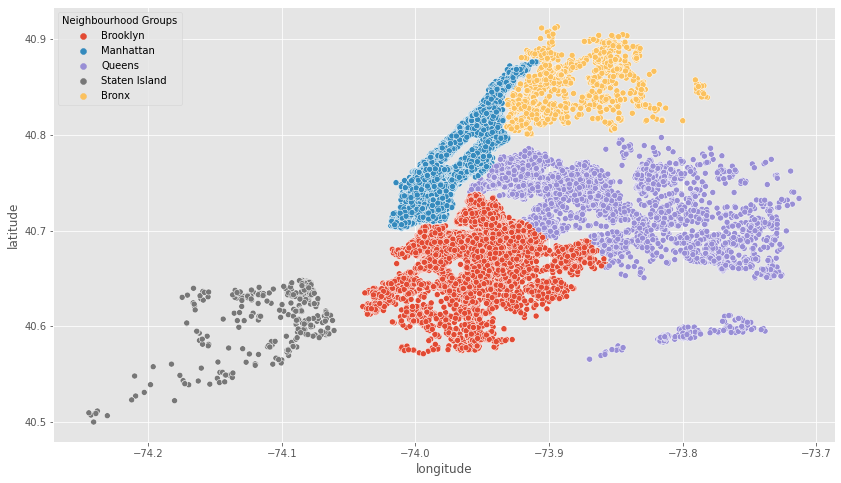

In [ ]:
#traffic in neighbourhood groups
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
sns.scatterplot(data=newdf, x='longitude', y='latitude',hue = 'neighbourhood_group')
plt.legend(title='Neighbourhood Groups')
plt.show()

Manhatten has very high density of rooms where as Staten Island has the lowest

Manhattan is the smallest neighbourhood group but contains the most number of Airbnb listings. We can see that there is a noticeable difference in traffic in different areas. Manhattan and Brooklyn are more crowded compared to the others. Manhattan is the most visited place in New York City because of its tourist spots. It is one of the reason why they have the highest number of Airbnb listings. Brooklyn also is really famous for its tourist spots. Both areas are densely populated and hence has more number of properties to be listed as an Airbnb. These maybe the reasons why there is a difference in traffic in these two areas compared to the others.

Now lets check the most expensive rooms

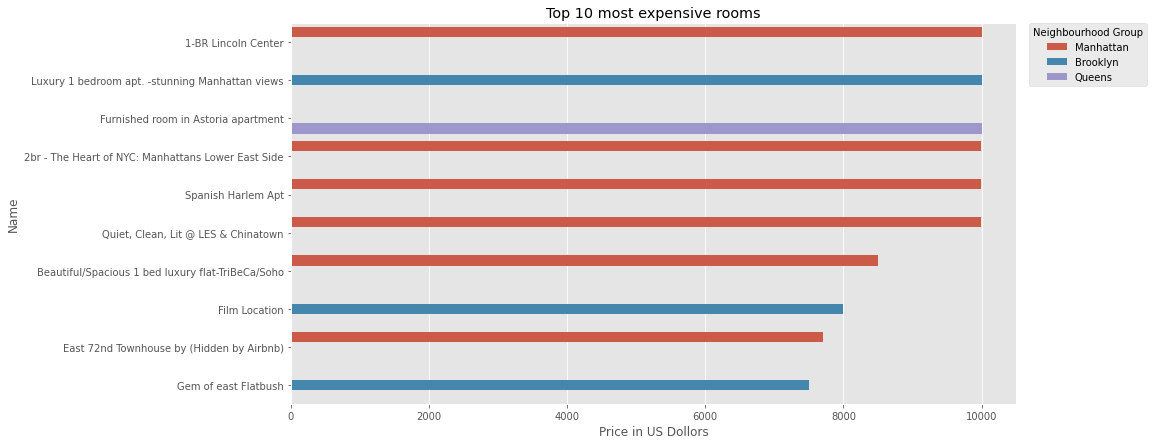

In [ ]:
#Top 10 most expensive rooms
Top_listings=newdf.groupby(["name","neighbourhood","neighbourhood_group"]).price.max().sort_values(ascending=False).head(10).reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
sns.barplot(y = 'name', x = 'price',hue= "neighbourhood_group", data = Top_listings)
plt.title("Top 10 most expensive rooms")
plt.ylabel("Name")
plt.xlabel("Price in US Dollors")
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.18, 1), loc='upper right', borderaxespad=0)
plt.show()

Manhatten holds 60% of top 10 most expensive rooms

Now lets find out most reviewed hosts.

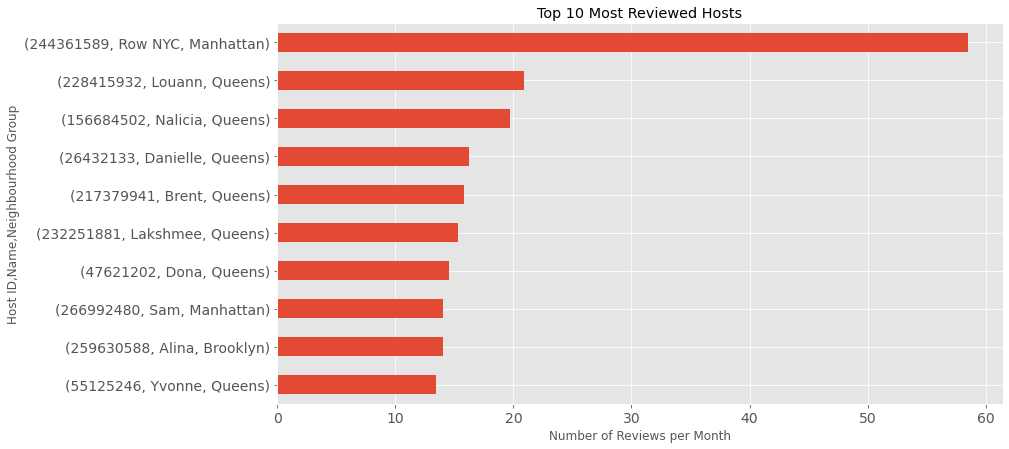

In [ ]:
#most reviewed hosts
super_hosts=newdf.groupby(["host_id","host_name","neighbourhood_group"])["reviews_per_month"].max().sort_values(ascending=False).head(10)
super_hosts.sort_values(ascending=True).plot.barh(figsize=(13,7),fontsize=14)
plt.style.use('ggplot')
plt.title("Top 10 Most Reviewed Hosts")
plt.ylabel("Host ID,Name,Neighbourhood Group")
plt.xlabel("Number of Reviews per Month")
plt.show()

Queens holds the 7 out of top 10 most reviewed hosts

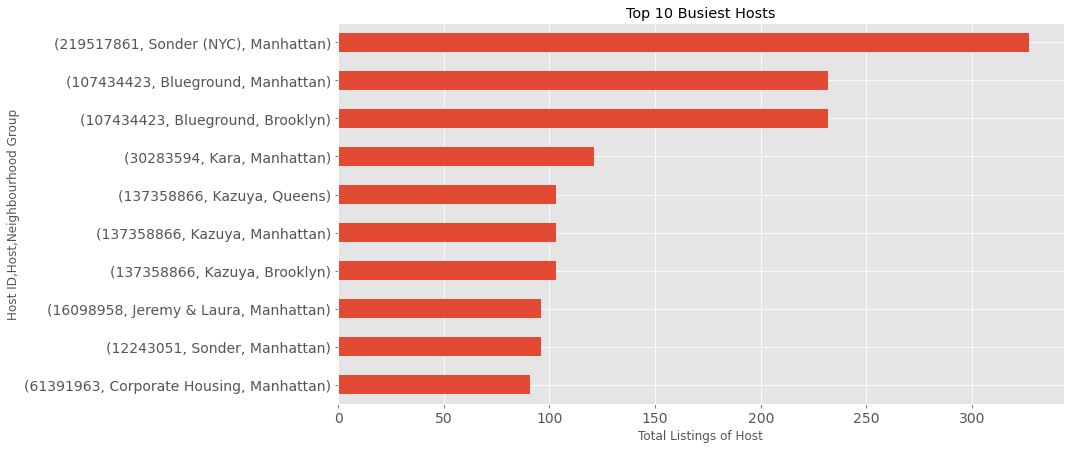

In [ ]:
# Top 10 Busiest Hosts
bussiest_host=newdf.groupby(["host_id","host_name","neighbourhood_group"])["calculated_host_listings_count"].max().sort_values(ascending=False).head(10)
bussiest_host.sort_values().plot.barh(figsize=(13,7),fontsize=14)
plt.style.use('tableau-colorblind10')
plt.title("Top 10 Busiest Hosts")
plt.ylabel("Host ID,Host,Neighbourhood Group")
plt.xlabel("Total Listings of Host")
plt.show()

Manhattan holds 70% of top 10 busiest hosts. Manhattan has the most number of Airbnb listings. This maybe the reason why hosts in Manhattan has more listings

Now lets check the impact of hosts listings on Number of reviews

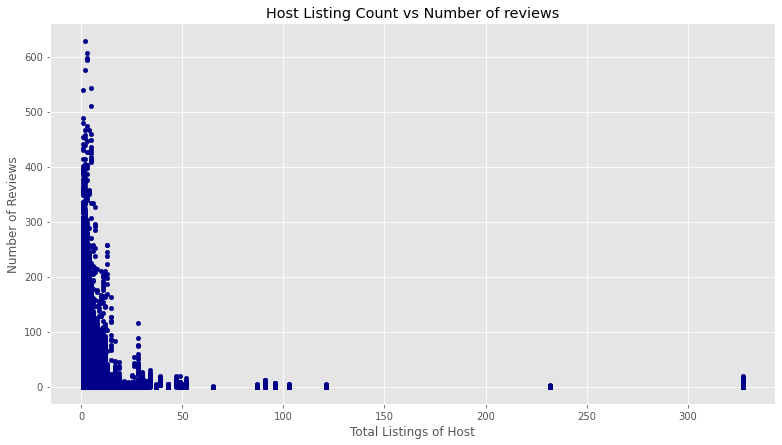

In [ ]:
newdf.plot.scatter(x='calculated_host_listings_count', y='number_of_reviews',c='DarkBlue', figsize=(13, 7),
                              title = "Host Listing Count vs Number of reviews")
plt.style.use('tableau-colorblind10')
plt.ylabel("Number of Reviews")
plt.xlabel("Total Listings of Host")
plt.show()

As we can see from the plot, lesser the number of listings a host has higher the number of reviews they got. Hosts who has lesser listings under their name has only less number of listings to look after. Hence they can provide better service to their guests and are getting more reviews which will infact help them in getting more bookings.

Now lets check the impact of hosts listings on price

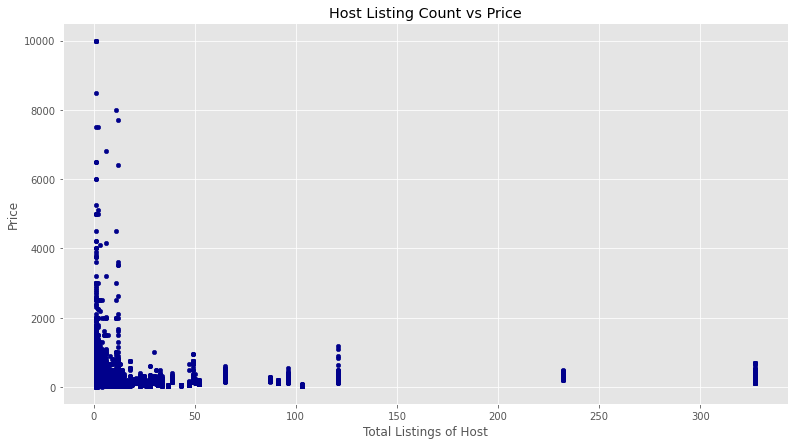

In [ ]:
#Host Listing Count vs Price
newdf.plot.scatter(x='calculated_host_listings_count', y='price',c='DarkBlue', figsize=(13, 7),
                              title = "Host Listing Count vs Price")
plt.style.use('tableau-colorblind10')
plt.ylabel("Price")
plt.xlabel("Total Listings of Host")
plt.show()

Here we can see, more the number of listings lesser the price. When the host has more number of llistings they can afford to rent out rooms for a less rate and still make a considerable profit

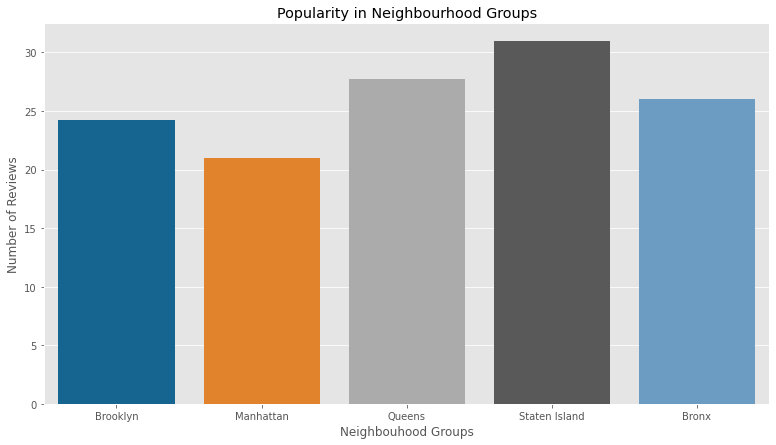

In [ ]:
#popularity in neighbourhood groups
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews',ci=None, data = newdf)
plt.title("Popularity in Neighbourhood Groups")
plt.ylabel("Number of Reviews")
plt.xlabel("Neighbouhood Groups")
plt.show()

Staten island contains a lot of attractive destination for travellers which maybe the reason for the high demand for properties

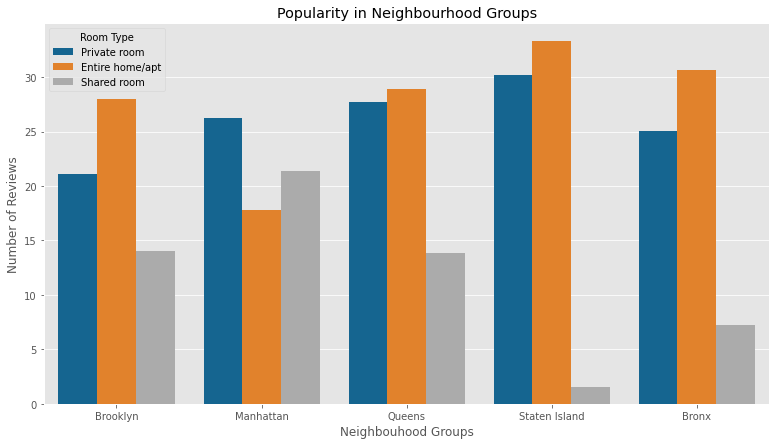

In [ ]:
#popularity in neighbourhood groups
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews',hue= "room_type",ci=None, data = newdf)
plt.title("Popularity in Neighbourhood Groups")
plt.ylabel("Number of Reviews")
plt.xlabel("Neighbouhood Groups")
plt.legend(title='Room Type')
plt.show()

Interestlingly, entire homes/apartments are most polular in every neighbourhood but Manhatten, which has most expensive entire homes.

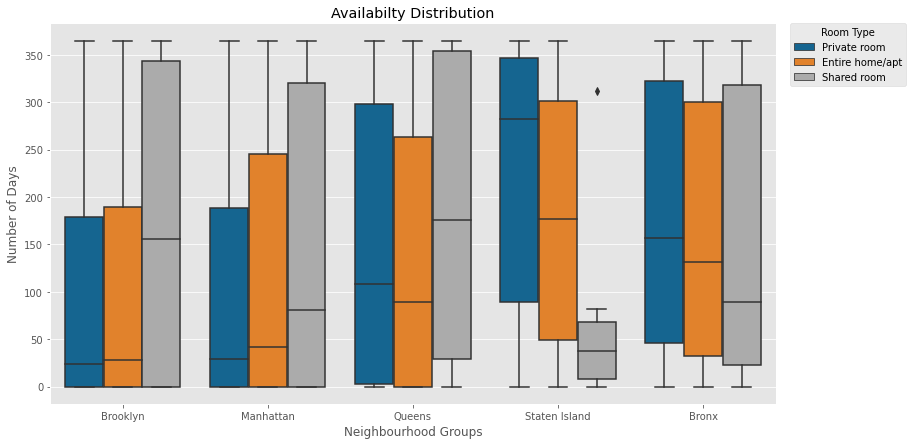

In [ ]:
#Availabity of room types in neighbourhood groups
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(13,7))
sns.boxplot(y="availability_365",x ='neighbourhood_group',hue="room_type" ,data = newdf)
plt.title("Availabilty Distribution")
plt.ylabel("Number of Days")
plt.xlabel("Neighbourhood Groups")
plt.legend(title='Room Type', bbox_to_anchor=(1.18, 1), loc='upper right', borderaxespad=0)
plt.show()

Shared rooms in Staten Island are less available. Private rooms in Brooklyn and Manhattan also has less availability.

### CONCLUSION

We reached the end of our analysis. There will be more insights that can be generated from this data. For now we are concluding the analysis here. We gained a lot of interesting insights from the data. We were able to find different trends in the data and visualise it for better understanding.

From the analysis we were able to gain several insights. They are given below
We found out that Entire rooms/apartments are the most expensive room types. They are the most popular room type in all the neighbourhood groups except for Manhattan

Manhattan despite being the smallest neighbourhood contains the most number of listings and hence is the densest. Manhattan being popular among tourists is one of the reason behind this. It is the most expensive neighbourhood group too. 6 out of top 10 expensive rooms are also in Manhattan. Manhattan also holds 7 out of top 10 busiest hosts.

Queens contain 7 out of top 10 reviewd hosts

We found that lesser the number of listings a host has higher the number of reviews they got. Also higher the number of listings lesser the price they kept for their listings.

Staten island properties properties are reviewd more(Number of reviews can be taken as a proxy for Number of bookings). Staten island contains a lot of attractive destination for travellers which maybe the reason for the high demand for properties.

Shared rooms in Staten Island are less available. Private rooms in Brooklyn and Manhattan also has less availability.